In [2]:
from google.colab import drive
import pandas as pd

drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import random
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ORI_data = pd.read_csv('/content/drive/MyDrive/Data science/bank data.csv')

In [ ]:
ORI_data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
ORI_data.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


Here output variable y  has values for the client subscribed a term deposit or not (binary: "yes","no")



In [ ]:
ORI_data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [ ]:
ORI_data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
ORI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
ORI_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

From above information we could see that there are no null values in data

In [ ]:
ORI_data.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
ORI_data.shape

(45211, 17)

In [ ]:
ORI_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
ORI_data.shape

(45211, 17)

Dropping unnecessary columns in data

In [ ]:
data = ORI_data.drop(['contact','day','duration','pdays','poutcome','education'],axis=1)

In [ ]:
data.describe()

,age,balance,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,0.580323
std,10.618762,3044.765829,3.098021,2.303441
min,18.000000,-8019.000000,1.000000,0.000000
25%,33.000000,72.000000,1.000000,0.000000
50%,39.000000,448.000000,2.000000,0.000000
75%,48.000000,1428.000000,3.000000,0.000000
max,95.000000,102127.000000,63.000000,275.000000


# Outliers handling

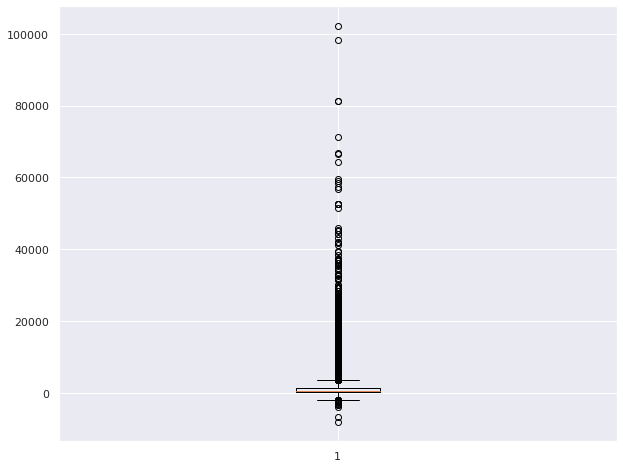

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(data['balance'])
plt.show()

In [ ]:
Q1 = np.percentile(data['balance'] , 25)
Q3 = np.percentile(data['balance'] , 75)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

outliers = data['balance'][(data['balance'] > ul) | (data['balance'] < ll)]
outliers

34       10635
65        6530
69       12223
70        5935
186       4384
         ...  
45164     4655
45181     6879
45185     4256
45191     3810
45208     5715
Name: balance, Length: 4729, dtype: int64

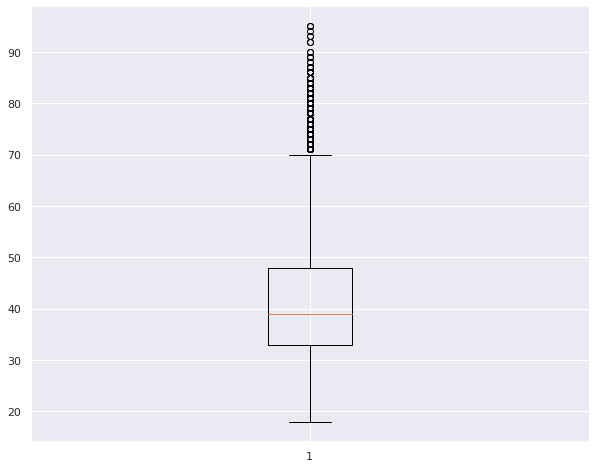

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(ORI_data['age'])
plt.show()

#age column is not having many outliers


In [ ]:
new_data = data[(data['balance'] < ul) & (data['balance'] > ll)]
new_data.shape

(40480, 11)

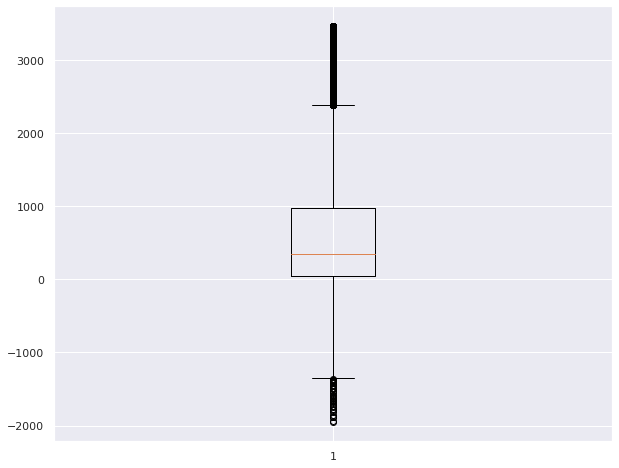

In [ ]:
plt.figure(figsize=(10,8))
plt.boxplot(new_data['balance'])
plt.show()

In [ ]:
new_data.head(10)

,age,job,marital,default,balance,housing,loan,month,campaign,previous,y
0,58,management,married,no,2143,yes,no,may,1,0,no
1,44,technician,single,no,29,yes,no,may,1,0,no
2,33,entrepreneur,married,no,2,yes,yes,may,1,0,no
3,47,blue-collar,married,no,1506,yes,no,may,1,0,no
4,33,unknown,single,no,1,no,no,may,1,0,no
5,35,management,married,no,231,yes,no,may,1,0,no
6,28,management,single,no,447,yes,yes,may,1,0,no
7,42,entrepreneur,divorced,yes,2,yes,no,may,1,0,no
8,58,retired,married,no,121,yes,no,may,1,0,no
9,43,technician,single,no,593,yes,no,may,1,0,no


In [ ]:
new_data.corr()

,age,balance,campaign,previous
age,1.000000,0.095594,0.006765,0.000841
balance,0.095594,1.000000,-0.033789,0.035570
campaign,0.006765,-0.033789,1.000000,-0.032302
previous,0.000841,0.035570,-0.032302,1.000000


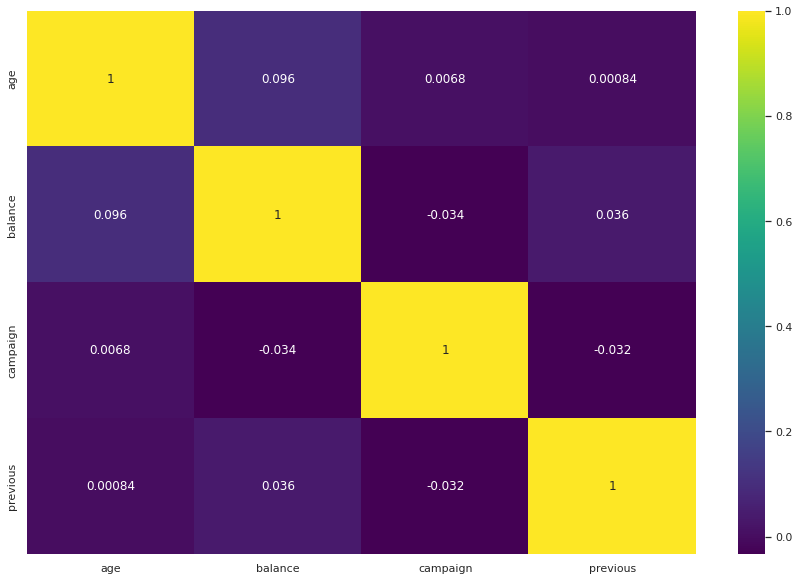

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data=new_data.corr(), annot=True, cmap='viridis')


# No any strong correlation between independent variables

In [ ]:
'contact','day','duration','pdays','poutcome'

('contact', 'day', 'duration', 'pdays', 'poutcome')

In [ ]:
feature_cols = ['age', 'job','marital','default','balance','housing', 'loan','campaign', 'previous']
X = new_data[feature_cols]
y = new_data['y']
 # Features
#y = new_data.y

In [ ]:
X

,age,job,marital,default,balance,housing,loan,campaign,previous
0,58,management,married,no,2143,yes,no,1,0
1,44,technician,single,no,29,yes,no,1,0
2,33,entrepreneur,married,no,2,yes,yes,1,0
3,47,blue-collar,married,no,1506,yes,no,1,0
4,33,unknown,single,no,1,no,no,1,0
...,...,...,...,...,...,...,...,...,...
45205,25,technician,single,no,505,no,yes,2,0
45206,51,technician,married,no,825,no,no,3,0
45207,71,retired,divorced,no,1729,no,no,2,0
45209,57,blue-collar,married,no,668,no,no,4,0


In [ ]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45205    yes
45206    yes
45207    yes
45209     no
45210     no
Name: y, Length: 40480, dtype: object

In [ ]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [ ]:
X

,age,balance,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unknown,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
1,44,29,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,1,0
2,33,2,1,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
3,47,1506,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
4,33,1,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45205,25,505,2,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
45206,51,825,3,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
45207,71,1729,2,0,0,0,0,0,0,1,...,0,1,0,0,1,0,1,0,1,0
45209,57,668,4,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [ ]:
X.shape

(40480, 25)

<Figure size 432x288 with 0 Axes>

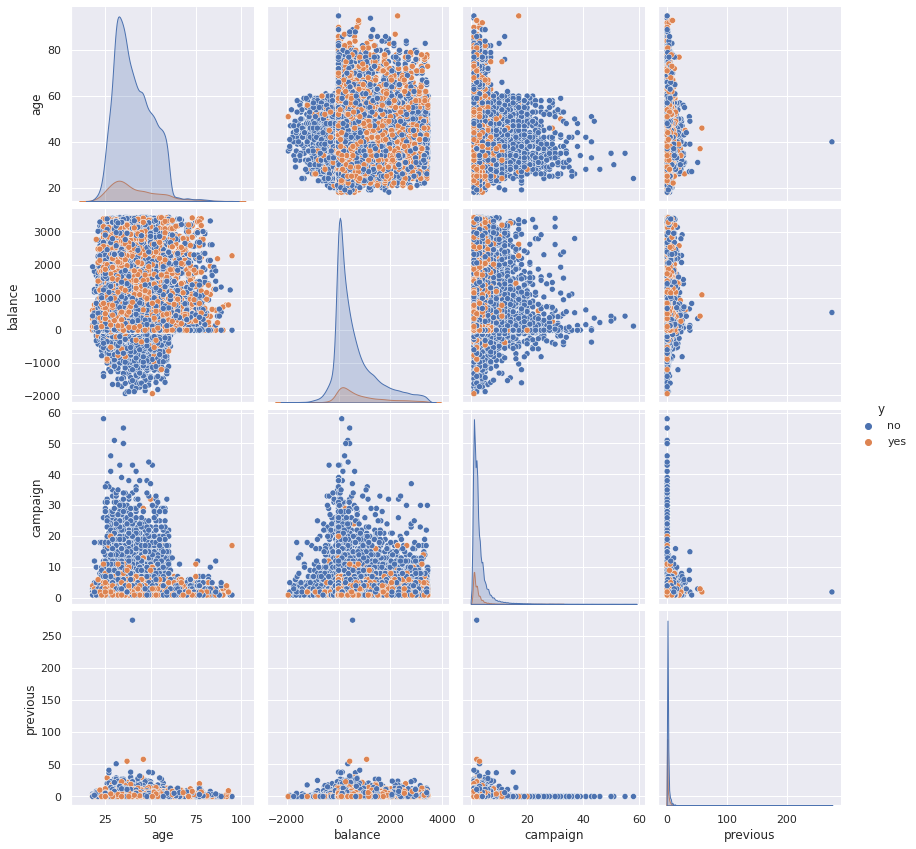

In [ ]:
plt.figure()
sns.pairplot(new_data, hue = "y", height=3)
plt.show()

In [ ]:
#y=y.drop(['yes'],axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

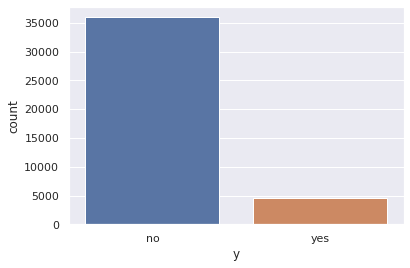

In [ ]:
sns.countplot(new_data['y'])
plt.show

In [ ]:
X.columns
X = X.drop(['default_no'], axis= 1)
X = X.rename(columns = {'default_yes': 'default'})
y.columns
y = y.drop(['yes'], axis=1)
y = y.rename(columns= {'no': 'y'})

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

skfold = StratifiedKFold(n_splits=5)
model = DecisionTreeClassifier()
scores1= cross_val_score(model,X,y,cv=skfold)
print(scores1)

[0.83510375 0.81410573 0.77556818 0.7826087  0.72714921]


In [ ]:
print(np.mean(scores1))

0.7869071146245059


In [ ]:
from sklearn.linear_model import LogisticRegression

Lgreg = LogisticRegression()

In [ ]:
scores2= cross_val_score(Lgreg,X,y,cv=skfold)
print(scores2)


[0.88833992 0.88858696 0.88833992 0.88537549 0.88290514]


In [ ]:
print(np.mean(scores2))

0.8867094861660079


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeighborsClassifier??


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
scores3= cross_val_score(model,X,y,cv=skfold)
print(scores3)

[0.87932312 0.88228755 0.88549901 0.88426383 0.85363142]


In [ ]:
print(np.mean(scores3))

0.8770009881422924


In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='linear')
scores_4= cross_val_score(model,X,y,cv=skfold)
print(scores3)
print(np.mean(scores_4))

[0.87932312 0.88228755 0.88549901 0.88426383 0.85363142]
0.888290513833992


In [ ]:
from sklearn.ensemble import RandomForestClassifier  
model = RandomForestClassifier(n_estimators= 10, criterion="entropy") 
scores_4= cross_val_score(model,X,y,cv=skfold) 
print(scores_4) 
print(np.mean(scores_4))

[0.87203557 0.86857708 0.84560277 0.84523221 0.77445652]
0.8411808300395258


### I can observe here that after applying stratified K fold classification models are giving pretty much good accuracy
